# Anexo Metodológico 
### Capital Científico e Identidad Científica: Revisión Sistemática (2006–2025)
## Visualizaciones Complementarias
#### Deisy Hurtado | Febrero 2026

Este notebook verifica los hallazgos reportados en la revisión sistemática, usando los datos del `corpus_limpio.csv` (que se generó ejecutando el archivo `analisis_openalex_completo.ipynb`).

**Gráficos complementarios generados:**
1. Distribución geográfica - Ausencia de Colombia
2. Niveles educativos - Vacío en primera infancia
3. Poblaciones subrepresentadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import collections

# Configuración de estilo
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Paleta institucional
AZUL = '#1B4F8A'
VERDE = '#2E8B57'
ROJO = '#C0392B'
NARANJA = '#E67E22'
GRIS = '#7F8C8D'
CLARO = '#D6E4F7'
MORADO = '#8E44AD'

# Cargar corpus
df = pd.read_csv('corpus_limpio.csv')  # Ajustar ruta si es necesario
print(f'Corpus cargado: {len(df)} artículos | {len(df.columns)} columnas')

Corpus cargado: 115 artículos | 27 columnas


---
## Gráfico 1: Distribución geográfica - Ausencia de Colombia
**Fuente:** columna `authorships.countries`

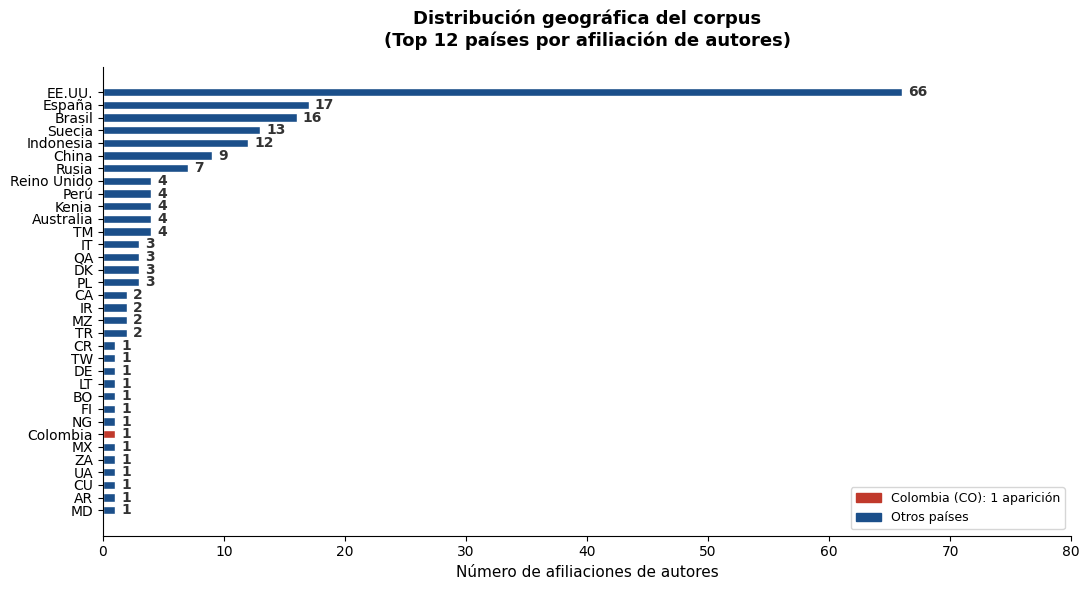

In [ ]:
# Parsear países
all_countries = []
for row in df['authorships.countries'].dropna():
    parts = str(row).split('|')
    for p in parts:
        p = p.strip()
        if p and p not in ['No especificado', '']:
            all_countries.append(p)

country_map = {
    'US':'EE.UU.','BR':'Brasil','ES':'España','SE':'Suecia','ID':'Indonesia',
    'CN':'China','RU':'Rusia','GB':'Reino Unido','PE':'Perú','KE':'Kenia',
    'AU':'Australia','CO':'Colombia'
}
country_counts = collections.Counter(all_countries)
top = country_counts.most_common(34)
labels = [country_map.get(c, c) for c, _ in top]
values = [n for _, n in top]
colors = [ROJO if country_map.get(c,c)=='Colombia' else AZUL for c, _ in top]

fig, ax = plt.subplots(figsize=(11, 6))
bars = ax.barh(labels[::-1], values[::-1], color=colors[::-1], edgecolor='white', height=0.65)
for bar, val in zip(bars, values[::-1]):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            str(val), va='center', fontsize=10, fontweight='bold', color='#333')
ax.set_xlabel('Número de afiliaciones de autores', fontsize=11)
ax.set_title('Distribución geográfica del corpus\n(Top 12 países por afiliación de autores)', fontsize=13, fontweight='bold', pad=15)
ax.set_xlim(0, 80)
patch_co = mpatches.Patch(color=ROJO, label=f'Colombia (CO): {country_counts.get("CO", 0)} aparición')
patch_other = mpatches.Patch(color=AZUL, label='Otros países')
ax.legend(handles=[patch_co, patch_other], loc='lower right', fontsize=9)
plt.tight_layout()
plt.savefig('grafico1_paises.png', dpi=150, bbox_inches='tight')
plt.show()

---
### Información detallada del artículo colombiano:

In [ ]:
# ── Datos de artículo colombiano ──
col = df[df['authorships.countries'].str.contains('CO', na=False)]
row = col.iloc[0]

print("=" * 60)
print("ÚNICO ARTÍCULO CON AFILIACIÓN COLOMBIANA EN EL CORPUS")
print("=" * 60)

print(f"\n Título:       {row['display_name']}")
print(f" Autor:        {row['authorships.author.display_name']}")
print(f"  Institución:  {row['authorships.institutions.display_name']}")
print(f" País:         {row['authorships.countries']}  (Colombia)")
print(f" Publicación:  {row['publication_date']}")
print(f" Revista:      {row['primary_location.source.display_name']}")
print(f" DOI:          {row['doi']}")
print(f"\n Métricas:")
print(f"   Citas:        {int(row['cited_by_count'])}")
print(f"   FWCI:         {round(row['fwci'], 2)}  (>1 = por encima del promedio mundial)")
print(f"   Acceso:       {row['open_access.oa_status']}")
print(f"   Tópico:       {row['primary_topic.display_name']}")

print(f"\n Abstract:")
print(f"{row['abstract']}")

print("\n" + "=" * 60)
print("RELACIÓN DE COLOMBIA CON EL ARTÍCULO")
print("=" * 60)
print("""
→ Colombia aparece por afiliación institucional del autor.
  El investigador pertenece a la Universidad Santo Tomás (CO).

→ El artículo no estudia a Colombia como objeto de investigación,
  aunque cita el proyecto colombiano 'Ponte Ahorrativo con
  el Agua' como caso de estudio relacionado con STEM.

→ Con FWCI de 6.57, es uno de los artículos de mayor impacto
  relativo en todo el corpus, a pesar de ser el único colombiano.
""")


ÚNICO ARTÍCULO CON AFILIACIÓN COLOMBIANA EN EL CORPUS

 Título:       Democratizing STEM
 Autor:        Carlos Daniel Caballero Barragán
  Institución:  Universidad Santo Tomás
 País:         CO  (Colombia)
 Publicación:  2025-05-15
 Revista:      American Journal of STEM Education
 DOI:          https://doi.org/10.32674/gznjkg56

 Métricas:
   Citas:        1
   FWCI:         6.58  (>1 = por encima del promedio mundial)
   Acceso:       bronze
   Tópico:       Career Development and Diversity

 Abstract:
Citizen Science has emerged as a transformative approach to democratizing STEM education, making scientific inquiry more accessible, inclusive, and socially relevant. This paper explores how participatory research initiatives engage underrepresented students in STEM, fostering equity, belonging, and active scientific participation. By involving students in real-world problem-solving—such as water conservation, air quality monitoring, and biodiversity tracking—Citizen Science bridges t

---
## Gráfico 2: Niveles educativos - Vacío en primera infancia
**Fuente:** columnas `abstract` y `display_name`

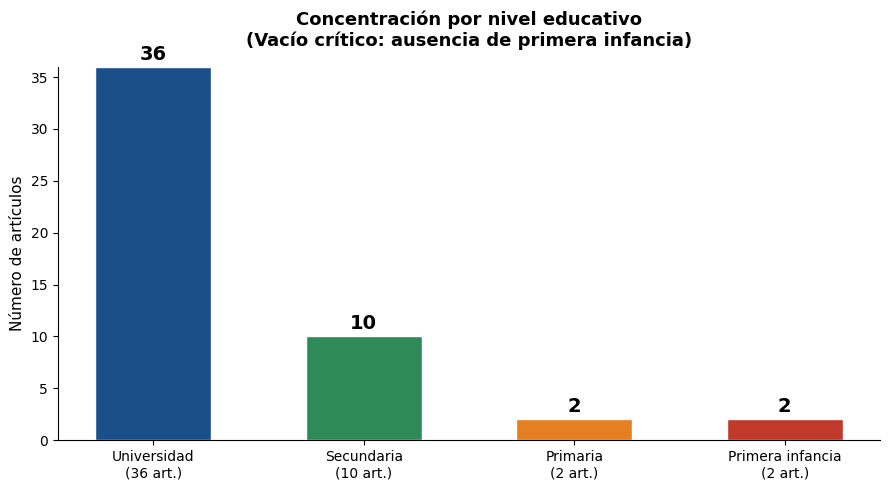

In [ ]:
niveles = {
    'Universidad': ['university', 'undergraduate', 'college', 'higher education', 'universitari'],
    'Secundaria': ['high school', 'secondary', 'middle school', 'secundaria', 'bachillerato'],
    'Primaria': ['elementary', 'primary school', 'primary education', 'educación primaria'],
    'Primera infancia': ['early childhood', 'preschool', 'kindergarten', 'infancia temprana', 'preescolar'],
}

conteos = {}
for nivel, kws in niveles.items():
    total = set()
    for kw in kws:
        matches = df[df['abstract'].str.contains(kw, case=False, na=False)].index.tolist()
        matches += df[df['display_name'].str.contains(kw, case=False, na=False)].index.tolist()
        total.update(matches)
    conteos[nivel] = len(total)

fig, ax = plt.subplots(figsize=(9, 5))
colores = [AZUL, VERDE, NARANJA, ROJO]
labels_n = [f'{k}\n({v} art.)' for k, v in conteos.items()]
bars2 = ax.bar(labels_n, conteos.values(), color=colores, edgecolor='white', width=0.55)
for bar, val in zip(bars2, conteos.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
            str(val), ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Número de artículos', fontsize=11)
ax.set_title('Concentración por nivel educativo\n(Vacío crítico: ausencia de primera infancia)', fontsize=13, fontweight='bold', pad=15)
ax.set_ylim(0, 36)

plt.tight_layout()
plt.savefig('grafico2_niveles.png', dpi=150, bbox_inches='tight')
plt.show()

---
## Gráfico 3: Poblaciones subrepresentadas
**Fuente:** columna `abstract`

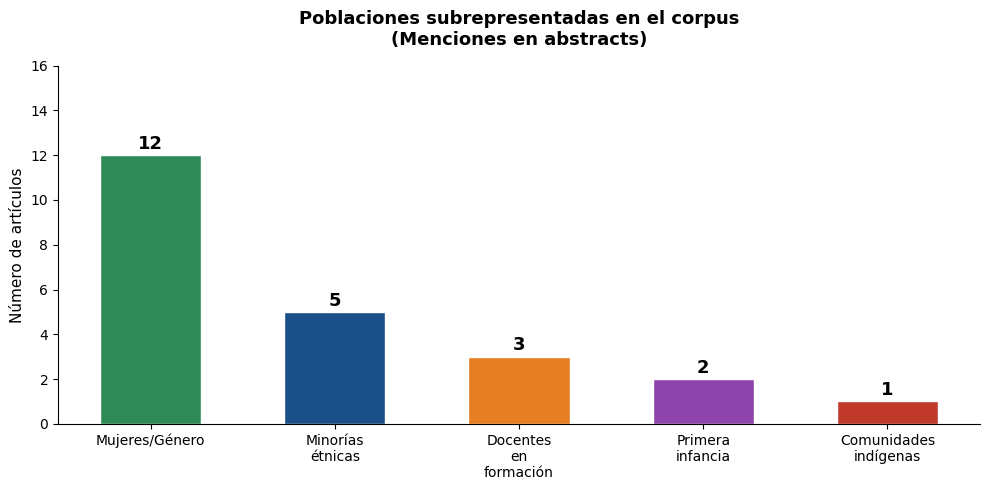

In [ ]:
grupos = {
    'Mujeres/Género': ['women', 'gender', 'female', 'girls', 'género'],
    'Minorías étnicas': ['minority', 'black', 'hispanic', 'latinx', 'african american', 'underrepresented'],
    'Docentes en formación': ['preservice', 'pre-service', 'teacher education', 'teacher training'],
    'Primera infancia': ['early childhood', 'preschool', 'kindergarten', 'infancia temprana'],
    'Comunidades indígenas': ['indigenous', 'indígena', 'native', 'aboriginal'],
}

conteos_g = {}
for grupo, kws in grupos.items():
    total = set()
    for kw in kws:
        matches = df[df['abstract'].str.contains(kw, case=False, na=False)].index.tolist()
        total.update(matches)
    conteos_g[grupo] = len(total)

fig, ax = plt.subplots(figsize=(10, 5))
colores_g = [VERDE, AZUL, NARANJA, MORADO, ROJO]
bars5 = ax.bar(
    [k.replace(' ', '\n') for k in conteos_g.keys()],
    conteos_g.values(), color=colores_g, edgecolor='white', width=0.55
)
for bar, val in zip(bars5, conteos_g.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            str(val), ha='center', va='bottom', fontsize=13, fontweight='bold')
ax.set_ylabel('Número de artículos', fontsize=11)
ax.set_title('Poblaciones subrepresentadas en el corpus\n(Menciones en abstracts)', fontsize=13, fontweight='bold', pad=15)
ax.set_ylim(0, 16)
plt.tight_layout()
plt.savefig('grafico5_poblaciones.png', dpi=150, bbox_inches='tight')
plt.show()

---
